In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73991,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73992,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73993,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73994,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
df.shape

(73996, 59)

In [5]:
print(df['location'].value_counts())

Argentina           435
Mexico              435
Thailand            432
Taiwan              420
South Korea         415
                   ... 
Falkland Islands     16
Montserrat           16
Macao                11
Northern Cyprus       9
Saint Helena          1
Name: location, Length: 215, dtype: int64


## Data Cleansing

In [7]:
df_ina=df.loc[df['location']=='Indonesia']
df_ina=df_ina.reset_index(drop=True)

In [8]:
df_ina.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
1,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
2,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
3,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
4,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718


In [9]:
df_ina.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
369,IDN,Asia,Indonesia,2021-03-06,1373836.0,5767.0,6394.571,37154.0,128.0,167.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
370,IDN,Asia,Indonesia,2021-03-07,1379662.0,5826.0,6432.571,37266.0,112.0,157.143,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
371,IDN,Asia,Indonesia,2021-03-08,1386556.0,6894.0,6463.143,37547.0,281.0,174.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
372,IDN,Asia,Indonesia,2021-03-09,1392945.0,6389.0,6559.857,37757.0,210.0,177.000,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
373,IDN,Asia,Indonesia,2021-03-10,1398578.0,5633.0,6392.000,37932.0,175.0,173.000,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718


In [10]:
df_ina.shape

(374, 59)

In [11]:
df_ina.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [12]:
df_ina=df_ina[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']]

In [13]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,NaN,NaN
1,2020-03-03,2.0,0.0,NaN,NaN
2,2020-03-04,2.0,0.0,NaN,NaN
3,2020-03-05,2.0,0.0,NaN,NaN
4,2020-03-06,4.0,2.0,NaN,NaN
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


In [14]:
df_ina=df_ina.fillna(0)

## Explorating Data and Analyzing (EDA)

<function matplotlib.pyplot.show(close=None, block=None)>

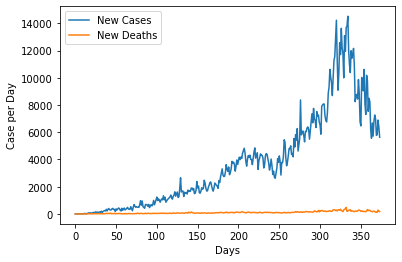

In [17]:
df_ina['new_cases'].plot(label='New Cases')
df_ina['new_deaths'].plot(label='New Deaths')
plt.xlabel('Days')
plt.ylabel('Case per Day')
plt.legend(loc='best')
plt.show

In [20]:
for i in range(len(df_ina)):
    if df_ina['new_cases'].iloc[i]==df_ina['new_cases'].max():
        print('The most positive cases on {}'.format(df_ina['date'].iloc[i]))
        print('With total {} positive cases'.format(df_ina['new_cases'].iloc[i]))
        break

The most positive cases on 2021-01-30
With total 14518.0 positive cases


<function matplotlib.pyplot.show(close=None, block=None)>

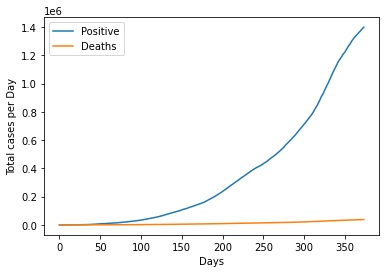

In [22]:
df_ina['total_cases'].plot(label='Positive')
df_ina['total_deaths'].plot(label='Total Deaths')
plt.xlabel('Days')
plt.ylabel('Total cases per Day')
plt.legend(loc='best')
plt.show

## Prediction Model

Original Sigmoid
$$ sig(t)=\frac{1}{1+e^{-t}}$$

Modified
$$ sig_m(t)=\frac{c}{1+e^{-(t-t_0)/a}}$$

c = peak value <br>
a = curve fitting coefisien <br>
t = total days <br>
t0 = total cases in day 1

<function matplotlib.pyplot.show(close=None, block=None)>

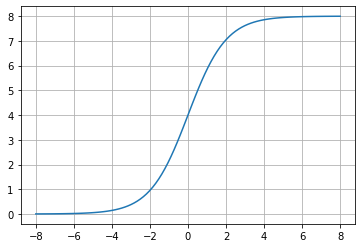

In [24]:
peak=8
x=np.linspace(-8,8,100)
y=peak/(1+np.exp(-x))
plt.plot(x,y, label='Sigmoid')
plt.grid()
plt.show

In [33]:
def sig_curve(t,a,t0,c):
    return c/(1+np.exp(-(t-t0)/a))

In [34]:
x=list(df_ina.index)
y=list(df_ina['total_cases'])

In [35]:
from scipy.optimize import curve_fit, fsolve

In [36]:
fit=curve_fit(sig_curve,x,y, method='trf')
varA, varB=fit

In [37]:
varA

array([6.91350359e+01, 3.71790920e+02, 2.84763309e+06])

In [38]:
varB

array([[5.78360567e-01, 2.65323964e+00, 5.86835564e+04],
       [2.65323964e+00, 1.35936408e+01, 3.06836968e+05],
       [5.86835564e+04, 3.06836968e+05, 6.98109548e+09]])

In [39]:
std_er=np.zeros(len(varA))
for i in range(len(varA)):
    std_er[i]=np.sqrt(varB[i][i])

In [40]:
std_er

array([7.60500208e-01, 3.68695549e+00, 8.35529502e+04])

In [41]:
a=varA[0]+std_er[0]
t0=varA[1]+std_er[1]
c=varA[2]+std_er[2]

In [42]:
def peak(x):
    return sig_curve(x,a,t0,c)-int(c)

In [46]:
n_peak=int(fsolve(peak,t0))

In [47]:
print('Peak Day Covid-19: '+str(n_peak))

Peak Day Covid-19: 1640


## Analyze

In [48]:
n_0=max(x)+1
pred_x=list(range(n_0, n_peak))

In [49]:
print('We have {} days until the peak of Covid-19'.format(str(len(pred_x))))

We have 1266 days until the peak of Covid-19


In [51]:
pred_y=np.zeros(len(x+pred_x))
for i in range(n_peak):
    pred_y[i]=sig_curve(i,a,t0,c)

In [52]:
print('Total cases prediction: {} cases'.format(int(pred_y[-1])))

Total cases prediction: 2931185 cases


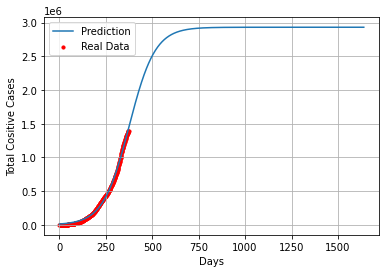

In [53]:
plt.plot(x+pred_x, pred_y, label="Prediction")
plt.scatter(x,y, label='Real Data', s=10, color='red')
plt.xlabel('Days')
plt.ylabel('Total Cositive Cases')
plt.grid()
plt.legend(loc='best')
plt.show()

## Accuracy

## R2 Score
$$ R^2=1-\frac{S_{res}}{S_{tot}}$$
$$ R^2=1-\frac{\Sigma (y_i-\hat{y_i})^2}{\Sigma (y_i-\bar{y})^2}$$

In [60]:
def r2_accuracy(y_real, y_pred, x):
    above=sum((y_real-y_pred[0:len(x)])**2)
    below=sum((y_real-np.mean(y))**2)
    r=1-(above/below)
    return r

In [61]:
acc=r2_accuracy(y,pred_y,x)

In [62]:
acc*100

99.74351978497839

In [63]:
from datetime import datetime, timedelta

In [64]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,0.0,0.0
1,2020-03-03,2.0,0.0,0.0,0.0
2,2020-03-04,2.0,0.0,0.0,0.0
3,2020-03-05,2.0,0.0,0.0,0.0
4,2020-03-06,4.0,2.0,0.0,0.0
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


In [65]:
date_fmt='%Y-%m-%d'
n1=df_ina['date'][0]
date_0=datetime.strptime(n1,date_fmt)
print(date_0)

2020-03-02 00:00:00


## Data Visualisation

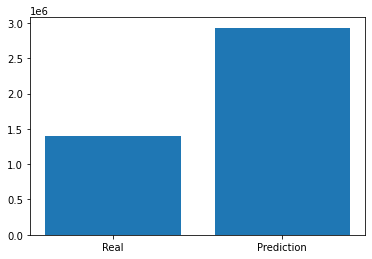

In [72]:
label=['Real', 'Prediction']
value=[df_ina['total_cases'].iloc[-1],
    pred_y[-1]]
plt.bar(label,value)
plt.show()

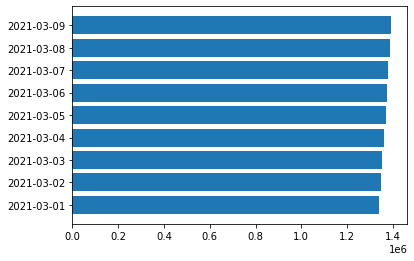

In [73]:
label=np.array(df_ina['date'].iloc[-10:-1], dtype=str)
value=np.array(df_ina['total_cases'].iloc[-10:-1], dtype=int)
plt.barh(label, value)
plt.show()